In [47]:
import cv2 

img = cv2.imread('./images/coffee.jpg')

cv2.imshow('Coffe image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
print(img.shape)
print('Height of Image:', int(img.shape[0]), 'pixels')
print('Width of Image: ', int(img.shape[1]), 'pixels')

(184, 274, 3)
Height of Image: 184 pixels
Width of Image:  274 pixels


In [49]:
B, G, R = img[0, 0] 
print(B, G, R)

73 172 224


In [50]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
print(gray_image.shape)

(184, 274)


In [11]:
print(gray_image[0, 0])
print(img[0, 0])

176
[ 73 172 224]


In [12]:
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image', hsv_image)
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
import cv2
import numpy as np

B, G, R = cv2.split(img)

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(img.shape[:2], dtype = "uint8")

cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
print(img.shape)
print(img.shape[:2])

(184, 274, 3)
(184, 274)


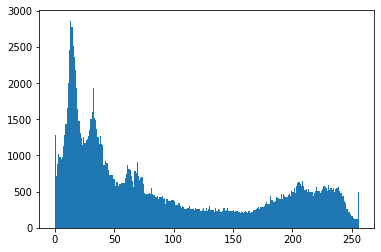

0 b
1 g
2 r


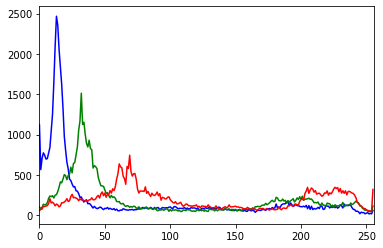

In [5]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(img.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    print(i,col)
    histogram2 = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [20]:
img = cv2.imread('./images/coffee.jpg')
cv2.putText(img, 'Have a nice day!', (10,150), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 3)
cv2.imshow("Nice day with coffee!", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:

# Store height and width of the image
height, width = img.shape[:2]

quarter_height, quarter_width = height/4, width/4

#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(img, T, (width, height))
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
print(T)

[[ 1.   0.  68.5]
 [ 0.   1.  46. ]]


In [35]:
img = cv2.imread('./images/coffee.jpg')
# Rotation
height, width = img.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.7)

rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

cv2.imshow('Original Image', img)


cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()


In [38]:
flipped = cv2.flip(img, 1)
cv2.imshow('Original image', img)
cv2.imshow('Horizontal Flip', flipped) 
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
# Resizing
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(img, None, fx=0.75, fy=1)
cv2.imshow('Scaling - Linear Interpolation', image_scaled) 
cv2.waitKey()

# Let's double the size of our image
img_scaled = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
cv2.waitKey()

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(img, (900, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled) 
cv2.waitKey()

image_scaled = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_LANCZOS4)
cv2.imshow('Scaling - Lanczos4 Interpolation', image_scaled) 
cv2.waitKey()

cv2.destroyAllWindows()

In [41]:
# Changing brightness
# Create a matrix of ones, then multiply it by a scaler of 75 
# This gives a matrix with same dimesions of our image with all values being 75
M = np.ones(img.shape, dtype = "uint8") * 75 

# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(img, M)
cv2.imshow("Added", added)

# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(img, M)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
# Bluring
# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(img, (3,3))
cv2.imshow('Averaging', blur)
cv2.waitKey(0)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(img, (7,7), 0)
cv2.imshow('Gaussian Blurring', Gaussian)
cv2.waitKey(0)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(img, 5)
cv2.imshow('Median Blurring', median)
cv2.waitKey(0)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
cv2.imshow('Bilateral Blurring', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
print(img.shape)
height, width = img.shape
print(height, width)

(184, 274, 3)


ValueError: too many values to unpack (expected 2)

In [51]:
# Edge detection 
height, width = gray_image.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow('Original', gray_image)
cv2.waitKey(0)
cv2.imshow('Sobel X', sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel_OR', sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)


##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.


# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(gray_image, 50, 120)
cv2.imshow('Canny', canny)
cv2.waitKey(0)

cv2.destroyAllWindows()